In [21]:
import pandas as pd
import numpy as np


import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

file = "C:/Users/TYS/Documents/study/Master/INSY662/group project/Real Code/INSY662-Group-Project/Data/dataset_demand.csv"
data = pd.read_csv(file)
data

,date,start_station_cluster,rideable_type,trip_count
0,2022-01-01,0,classic_bike,94
1,2022-01-01,0,electric_bike,196
2,2022-01-01,1,classic_bike,11
3,2022-01-01,1,electric_bike,8
4,2022-01-01,2,classic_bike,37
...,...,...,...,...
12299,2022-12-31,17,electric_bike,189
12300,2022-12-31,18,classic_bike,13
12301,2022-12-31,18,electric_bike,46
12302,2022-12-31,19,classic_bike,9


In [22]:
# Filter data for start_station_cluster 0
#cluster_data = data[data['start_station_cluster'] == 0]

# Separate data for classic bikes and electric bikes
# use data instead of cluster_data
classic_bike_data = data[data['rideable_type'] == 'classic_bike']
electric_bike_data = data[data['rideable_type'] == 'electric_bike']
all_bike_data = data

classic_bike_data.head(), electric_bike_data.head()

(         date  start_station_cluster rideable_type  trip_count
 0  2022-01-01                      0  classic_bike          94
 2  2022-01-01                      1  classic_bike          11
 4  2022-01-01                      2  classic_bike          37
 5  2022-01-01                      3  classic_bike         118
 7  2022-01-01                      4  classic_bike          65,
          date  start_station_cluster  rideable_type  trip_count
 1  2022-01-01                      0  electric_bike         196
 3  2022-01-01                      1  electric_bike           8
 6  2022-01-01                      3  electric_bike         262
 8  2022-01-01                      4  electric_bike          97
 9  2022-01-01                      6  electric_bike           8)

In [23]:
# Convert 'date' to datetime and set as index
classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])
all_bike_data['date'] = pd.to_datetime(all_bike_data['date'])
classic_bike_data.set_index('date', inplace=True)
electric_bike_data.set_index('date', inplace=True)
all_bike_data.set_index('date', inplace=True)

# Display the first few rows of each dataset
classic_bike_data.head(), electric_bike_data.head() 

C:\Users\TYS\AppData\Local\Temp\ipykernel_52100\3828104725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
C:\Users\TYS\AppData\Local\Temp\ipykernel_52100\3828104725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8)

In [24]:
# Make sure the data is sorted by date
classic_bike_data.sort_index(inplace=True)
electric_bike_data.sort_index(inplace=True)
all_bike_data.sort_index(inplace=True)

# Determine the split point for the classic bike data
split_point_classic = len(classic_bike_data) // 2

# Split the classic bike data into train and test
classic_bike_train = classic_bike_data.iloc[:split_point_classic]
classic_bike_test = classic_bike_data.iloc[split_point_classic:]

# Determine the split point for the electric bike data
split_point_electric = len(electric_bike_data) // 2

# Split the electric bike data into train and test
electric_bike_train = electric_bike_data.iloc[:split_point_electric]
electric_bike_test = electric_bike_data.iloc[split_point_electric:]

split_point_all = len(all_bike_data) // 2

all_bike_train = all_bike_data.iloc[:split_point_all]
all_bike_test = all_bike_data.iloc[split_point_all:]

# You now have the train and test sets for both classic and electric bikes

# Display the first few rows of each dataset
classic_bike_train.head(), electric_bike_train.head(),all_bike_train.head()


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01  

In [ ]:
from pmdarima import auto_arima
import pandas as pd
from pandas import Timedelta, Timestamp
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame containing all clusters and bike types
clusters = data['start_station_cluster'].unique()
arima_params = {}

for cluster in clusters:
    for bike_type in ['classic_bike', 'electric_bike']:
        # Define the key for storing in the dictionary
        key = (cluster, bike_type)

        # Filter data for the current cluster and bike type
        cluster_bike_data = all_bike_train[(all_bike_train['start_station_cluster'] == cluster) &
                                 (all_bike_train['rideable_type'] == bike_type)]['trip_count'].dropna()

        # Convert the series to float
        cluster_bike_data = cluster_bike_data.astype(float)

        # Convert the index to weekly period
        cluster_bike_data.index = pd.DatetimeIndex(cluster_bike_data.index).to_period('D')

        try:
            # Find the best ARIMA parameters
            model = auto_arima(cluster_bike_data,
                               seasonal=True,
                               trace=True,
                               error_action='warn',
                               suppress_warnings=False,
                               stepwise=True,
                               max_p=3, max_q=3, max_d=2,
                               max_order=None,
                               enforce_stationarity=True,
                               enforce_invertibility=True)

            # Store parameters
            arima_params[key] = {
                'order': model.order,
                'seasonal_order': model.seasonal_order,
                'aic': model.aic()
            }

            # Concise output
            print(f"Cluster {cluster} ({bike_type.capitalize()}): ARIMA{model.order}, Seasonal Order={model.seasonal_order}, AIC={model.aic()}")

        except Exception as e:
            print(f"Failed to find ARIMA model for {bike_type} in cluster {cluster}: {e}")

In [33]:
c_temp_0 = classic_bike_train[classic_bike_train['start_station_cluster'] == 0]
c_temp_0

,start_station_cluster,rideable_type,trip_count
date,,,
2022-01-01,0,classic_bike,94
2022-01-02,0,classic_bike,111
2022-01-03,0,classic_bike,125
2022-01-04,0,classic_bike,139
2022-01-05,0,classic_bike,174
...,...,...,...
2022-06-28,0,classic_bike,481
2022-06-29,0,classic_bike,450
2022-06-30,0,classic_bike,434


In [39]:
classic_start = len(classic_bike_train)
classic_end = len(classic_bike_data) + len(classic_bike_test) - 1
electric_start = len(electric_bike_train)
electric_end = len(electric_bike_data) + len(electric_bike_test) - 1


In [56]:
# def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Ensure the date is in the proper format
#     date_to_predict = pd.to_datetime(date_to_predict)

#     # Select the appropriate training dataset
#     if bike_type_to_predict == "electric_bike":
#         cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Ensure there is enough data to fit the model
#     if len(cluster_temp) == 0:
#         raise ValueError(f"No data available for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

#     # Fit the ARIMA model
#     model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
#     model = ARIMA(cluster_temp['trip_count'], order=model_order)
#     results = model.fit()

#     # Forecast up to the date of interest
#     # Assuming the index of the cluster_temp is a DatetimeIndex and is in ascending order
#     forecast_end = (date_to_predict - cluster_temp.index[0]).days
#     forecast = results.get_prediction(start=0, end=forecast_end)

#     # Extract the forecast for the specific date
#     try:
#         predicted_count = forecast.predicted_mean.loc[date_to_predict]
#     except KeyError:
#         raise KeyError(f"No prediction available for {date_to_predict}. Model forecast may not cover this date.")

#     return predicted_count


In [63]:
def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
    # Ensure the date is in the proper format
    date_to_predict = pd.to_datetime(date_to_predict)

    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

    # Ensure there is enough data to fit the model
    if len(cluster_temp) == 0:
        raise ValueError(f"No data available for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

    # Fit the ARIMA model
    model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
    model = ARIMA(cluster_temp['trip_count'], order=model_order)
    results = model.fit()

    # Predict up to the date of interest
    # We will use the number of periods from the training dataset as the start of the forecast
    forecast_start = len(cluster_temp)
    forecast_end = forecast_start + (date_to_predict - cluster_temp.index[-1]).days
    forecast = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=False)

    # Extract the forecast for the specific date
    # We need to align the date_to_predict with the forecast index
    forecast_index = pd.date_range(start=cluster_temp.index[-1], periods=forecast_end - forecast_start + 1, freq='D')
    predicted_count = forecast.predicted_mean[forecast_index == date_to_predict]

    # If there's no prediction for the date, or if there are multiple, return None or handle it
    if not predicted_count.empty:
        return predicted_count.iloc[0]
    else:
        raise ValueError(f"No prediction available for {date_to_predict}.")


In [95]:
# Example parameters
cluster_to_predict = 6  # This is the cluster number you want to predict for
bike_type_to_predict = 'electric_bike'  # This can be 'classic_bike' or 'electric_bike'
date_to_predict = '2022-09-14'  # The date you want to make the prediction for, in 'YYYY-MM-DD' format

# Call the demand_forecasting function with the example parameters
predicted_trip_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict)

# Print out the result
print(f"The predicted trip count for cluster {cluster_to_predict}, bike type '{bike_type_to_predict}', on {date_to_predict} is: {predicted_trip_count}")


The predicted trip count for cluster 6, bike type 'electric_bike', on 2022-09-14 is: 20.141480048115746


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [104]:
row = data.iloc[8649]
print(row)

start_station_cluster                6
rideable_type            electric_bike
trip_count                          21
Name: 2022-09-14 00:00:00, dtype: object


In [85]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

def plot_demand_forecasting(cluster_to_predict, bike_type_to_predict):
    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        train_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
        test_temp = electric_bike_test[electric_bike_test['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        train_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
        test_temp = classic_bike_test[classic_bike_test['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

    # Fit the ARIMA model
    model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
    model = ARIMA(train_temp['trip_count'], order=model_order)
    results = model.fit()

    # Forecast for the test period
    forecast_start = train_temp.index[-1] + pd.Timedelta(days=1)  # The day after the last training data point
    forecast_end = test_temp.index[-1]  # The last day of the test data
    
    # Use get_forecast instead of get_prediction for out-of-sample prediction
    forecast = results.get_forecast(steps=(forecast_end - forecast_start).days + 1)
    forecasted_counts = forecast.predicted_mean

    # The forecasted_counts should already have an index that matches the forecast range.
    # If it doesn't, we create a new index and assign it to the forecasted_counts.
    if not forecasted_counts.index.equals(test_temp.index):
        forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq='D')
        forecasted_counts.index = forecast_index
    
    # Plot the forecasted counts against the actual counts in the test set
    plt.figure(figsize=(14, 7))
    plt.plot(train_temp.index, train_temp['trip_count'], label='Training Data', color='blue')
    plt.plot(test_temp.index, test_temp['trip_count'], label='Actual Test Data', color='orange')
    plt.plot(forecasted_counts.index, forecasted_counts, label='Forecasted Data', color='green', linestyle='--')
    plt.title(f'Forecasted vs Actual Trip Counts for {bike_type_to_predict.capitalize()} in Cluster {cluster_to_predict}')
    plt.xlabel('Date')
    plt.ylabel('Trip Count')
    plt.legend()
    plt.show()


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


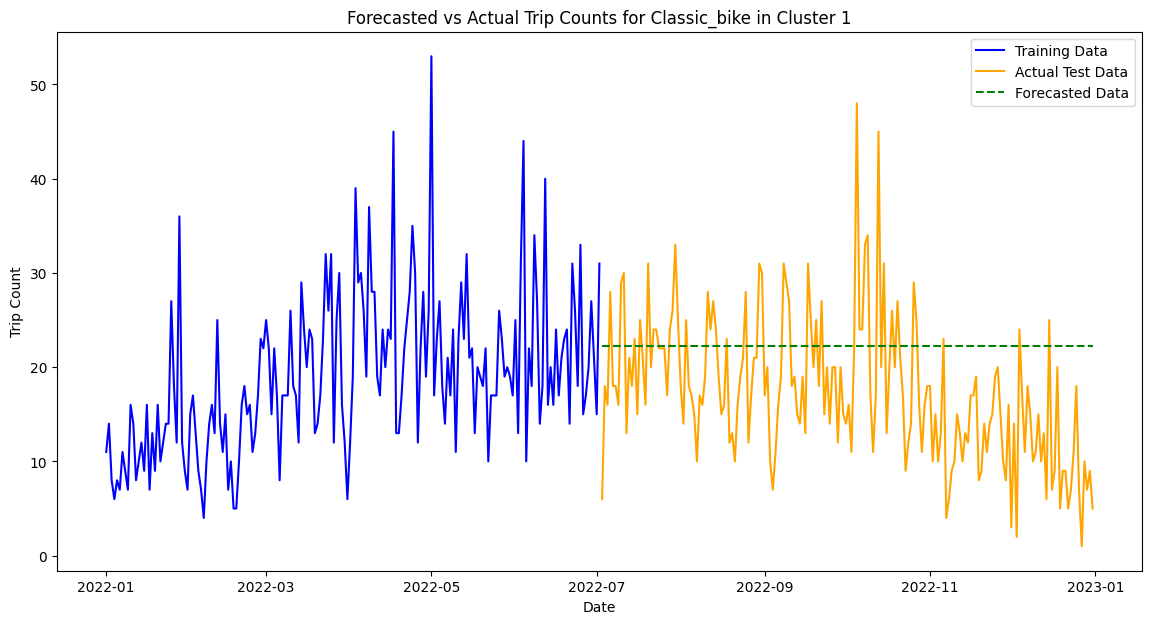

In [86]:
# Example usage
plot_demand_forecasting(1, 'classic_bike')

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def plot_demand_forecasting(cluster_to_predict, bike_type_to_predict, start_date, end_date):
    # Generate the date range for predictions
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Initialize a list to store predictions
    predictions = []
    
    # Loop over the date range and predict for each date
    for current_date in date_range:
        predicted_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, current_date)
        predictions.append(predicted_count)
    
    # Convert the list of predictions to a pandas Series with date_range as the index
    predictions_series = pd.Series(predictions, index=date_range)

    # Plot the actual and predicted values
    plt.figure(figsize=(14, 7))
    # Assuming there is a dataframe 'actual_counts' with actual trip counts
    actual_counts = data.loc[date_range, 'trip_count']
    plt.plot(date_range, actual_counts, label='Actual Trip Counts', color='blue')
    plt.plot(date_range, predictions_series, label='Predicted Trip Counts', color='orange', linestyle='--')
    plt.title(f'Actual vs Predicted Trip Counts for {bike_type_to_predict.capitalize()} in Cluster {cluster_to_predict}')
    plt.xlabel('Date')
    plt.ylabel('Trip Count')
    plt.legend()
    plt.show()


In [94]:
# Example usage: Plot the demand forecasting from '2022-01-01' to '2022-01-31' for cluster 1 and classic bikes
plot_demand_forecasting(0, 'classic_bike', '2022-01-02', '2022-02-13')

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: Prediction must have `end` after `start`.